# 財報附註嚴重影響財務比率的判讀(3)：應收帳款收款天數

接續前一篇：科目重分類(1)南亞科

這篇展示另一個會計科目應該進行調整，把原本財務報表上的科目，按照財報附註揭露的事項

重新進行分類後會出現截然不同結果的例子

本次的範例是應收帳款收款天數，計算公式為：

應收帳款收款天數 = 365*應收帳款 / 營業收入

這個例子是智寶電子(2375)，根據其官網說明，這是一間被動元件製造商

一般來說，製造業的應收帳款收款天數都會類似，介於90~180天之間

但是智寶電子的應收帳款收款天數卻非常詭異

我們一樣使用之前提過的"如何合併日股價與季財務簡表"範例模組來查詢財報資料


In [2]:
%load merge_finance_price.py

In [3]:
table_kind = 'TWN'
sampledates = ['2006-01-01','2009-01-01']   #要查詢的資料日期區間，必填
check_coid = ['2375']                       #要查詢的股票代碼 ，可以輸入空值[]，則自動查詢全部代碼   
date_type = 'A'                             #輸入'A'，則是逐季累積，'Q'則是非累積的單季財報
#執行此function即可取得合併結果，執行時間需要1~2小時
mf = merge_finance_price_all()
data = mf.do_query_only(table_kind,date_type,check_coid,sampledates)


接著計算未作任何調整的應收帳款收款天數如下：

In [6]:
data['調整前應收帳款收款天數'] = 365*data['營業收入淨額'] / data['應收帳款及票據']
data[['mdate','調整前應收帳款收款天數']]

,mdate,調整前應收帳款收款天數
None,,
0,2008-12-01 00:00:00+00:00,1074.029081
1,2008-09-01 00:00:00+00:00,598.404375
2,2008-06-01 00:00:00+00:00,466.625313
3,2008-03-01 00:00:00+00:00,222.796557
4,2007-12-01 00:00:00+00:00,1022.729814
5,2007-06-01 00:00:00+00:00,440.058912
6,2006-12-01 00:00:00+00:00,932.448200
7,2006-06-01 00:00:00+00:00,466.255741


從上面的計算結果可以發現，2006~2008年這段時間，不但應收帳款始終高於一般水準

甚至動輒突破1000天這種不可思議的數字

正常的製造業要是收款的效率如此低落，經營上恐怕會有困難

因此我們看看財報上怎麼記載：

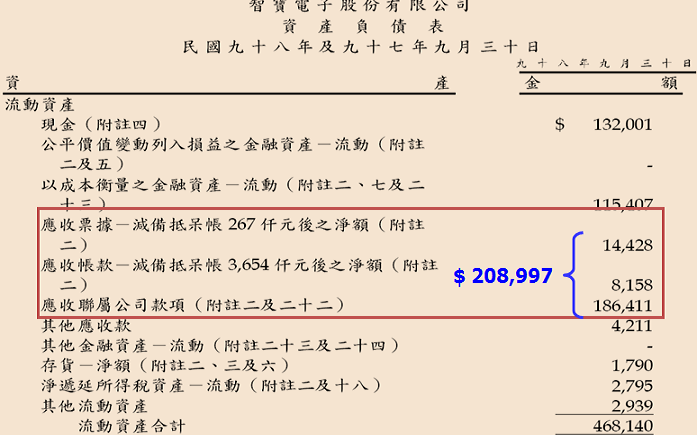

從上面資產負債表可以看到，「應收」項目有三個，除了一般常見的應收票據與應收帳款外

還有一個「應收聯屬公司款項」，查看財報的附註說明如下：

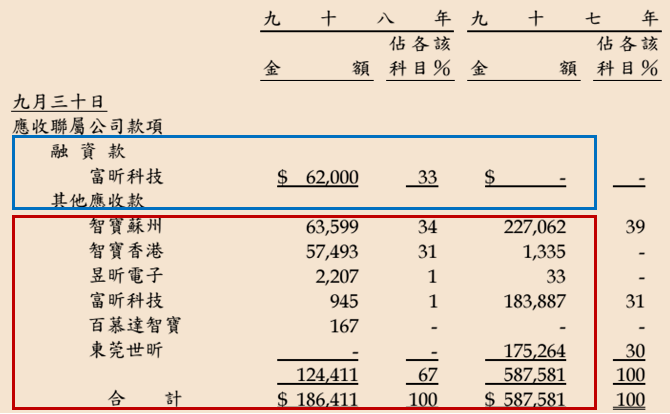

上圖藍色框標示處說明是一般的融資，下面紅框的部分則說明是「其他」應收款

不是一般因為銷售貨物而成立的代收款項

也就是說如果直接把財報上揭露的所有應收款項加總，必然會計算出非常不合現實的應收帳款收款天數

因此TEJ的財務比例資料中所提供的「平均收帳天數」是只考慮此公司正常營業產生的應收帳款去計算

把兩者比較一下，就知道差異有多麼大：

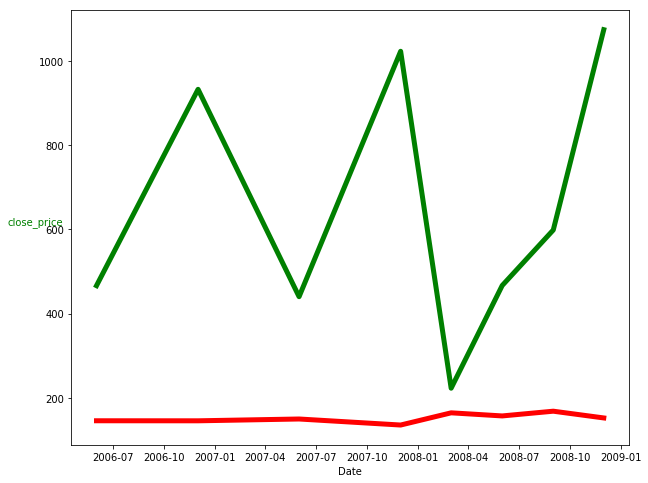

In [8]:
import matplotlib.pyplot as plt
xy = data[data['coid']=='2375'].reindex(columns=['mdate','調整前應收帳款收款天數','平均收帳天數']).values
fig, ax1 = plt.subplots(figsize=(10,8))
xy = xy[xy[:,0].argsort()]
ax1.plot(xy[:, 0], xy[:, 1], linewidth=5,color='green')
ax1.plot(xy[:, 0], xy[:, 2], linewidth=5,color='red' )
ax1.set_xlabel('Date')
yx1 = ax1.set_ylabel('收款天數', color='green')
yx1.set_rotation(0)
plt.show()  

下方紅色線就是TEJ透過附註資訊，把應收帳款重新分類後計算的應收帳款收款天數
可以看到紅色線非常穩定地在150天上下，而不像綠色線的原始計算結果
不但波動誇張，甚至會突破1000天這種不合理的水準